In [1]:
# 指导教师：宋陆军教师
# 参考资料：基于python的金融分析与风险管理-斯文
# 风险管理与金融机构赫尔

In [2]:
import numpy as  np #导入numpy模块
import pandas as pd #导入pandas模块
import scipy #导入scipy 统计模块
import matplotlib.pyplot as plt #导入pyplot模块
from pylab import mpl #导入mpl模块
# mpl.rcParams["font.sans-serif"] = ["simehei"]
# mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [3]:
import scipy.stats as st

In [4]:
GHYH_HS300 = pd.read_excel("D:\\BaiduNetdiskWorkspace\\source\\xs数据\\工商银行与沪深300指数.xlsx",sheet_name = "Sheet1", header=0)

In [5]:
GHYH_HS300.head()

,date,ICBC,HS300
0,2016-01-04 00:00:00,-0.028384,-0.070206
1,2016-01-05 00:00:00,0.004494,0.002800
2,2016-01-06 00:00:00,0.008949,0.017543
3,2016-01-07 00:00:00,-0.017738,-0.069333
4,2016-01-08 00:00:00,0.006772,0.020392


In [6]:
GHYH_HS300.describe()

,ICBC,HS300
count,731.000000,731.000000
mean,0.000463,-0.000223
std,0.012214,0.011826
min,-0.058124,-0.070206
25%,-0.004651,-0.005144
50%,0.000000,0.000350
75%,0.006391,0.005075
max,0.061012,0.043167


<AxesSubplot:>

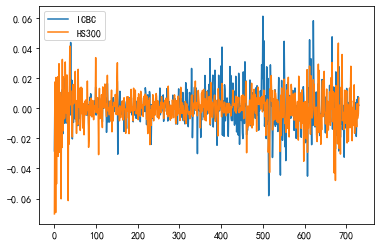

In [7]:
GHYH_HS300.plot()

<AxesSubplot:>

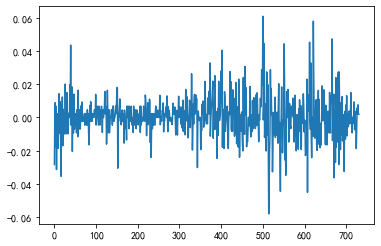

In [8]:
GHYH_HS300.iloc[:,1].plot()

In [9]:
jc =GHYH_HS300.iloc[:,1]-GHYH_HS300.iloc[:,2]

<AxesSubplot:>

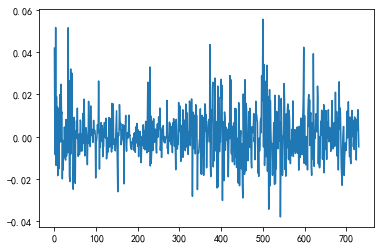

In [10]:
jc.plot()

In [11]:
import statsmodels
import statsmodels.api as sm

In [12]:
GHYH_HS300 = GHYH_HS300.dropna() #删除缺失值

In [13]:
Y = GHYH_HS300.iloc[:,1] #因变量的样本值

In [14]:
X = GHYH_HS300.iloc[:,2] #自变量的样本值

In [15]:
X_addcons = sm.add_constant(X) #对自变量的样本值增加一列常数项

In [16]:
model = sm.OLS(endog= Y,exog= X_addcons) #构建普通最小二乘法的线性回归模型

In [17]:
result = model.fit()

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ICBC   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     281.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.29e-53
Time:                        16:19:28   Log-Likelihood:                 2302.7
No. Observations:                 731   AIC:                            -4601.
Df Residuals:                     729   BIC:                            -4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.521      0.129      -0.000       0.001
HS300          0.5449      0.032     16.768      0.000       0.481       0.609
==============================================================================
Omnibus:                       90.243   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.477
Skew:                           0.451   Prob(JB):                     4.95e-92
Kurtosis:                       6.604   Cond. No.                         84.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

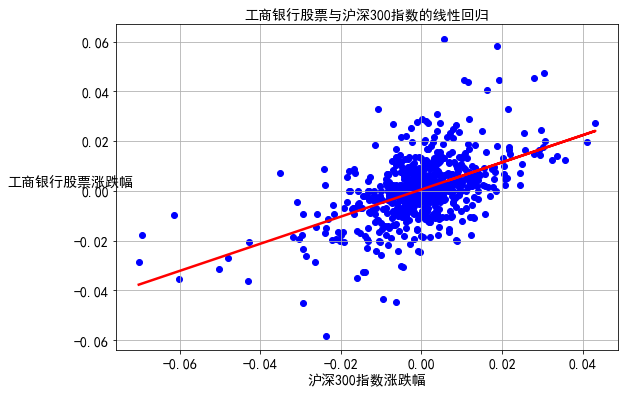

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(X,Y,c="b",marker="o")
plt.plot(X,result.params[0]+result.params[1]*X,"r-",lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'沪深300指数涨跌幅',fontsize =14)
plt.ylabel(u'工商银行股票涨跌幅',fontsize =14,rotation=0)
plt.title(u'工商银行股票与沪深300指数的线性回归',fontsize =14 )
plt.grid()

In [20]:
import numpy as  np 
#导入numpy模块
import pandas as pd
#导入pandas模块
import scipy
#导入scipy 统计模块
import matplotlib.pyplot as plt
#导入pyplot模块
from pylab import mpl
#导入pylab模块
mpl.rcParams["font.sans-serif"] = ["simehei"]
mpl.rcParams["axes.unicode_minus"] = False
import scipy.stats as st

In [21]:
HS300_SZ180 = pd.read_excel("D:\\BaiduNetdiskWorkspace\\source\\xs数据\\沪深300指数与上证180指数的日涨跌幅（2016-2018）.xlsx",sheet_name = "Sheet1", header=0)

In [22]:
HS300_SZ180.head()

,日期,沪深300涨跌幅,上证180涨跌幅
0,2016-01-04,-0.070206,-0.067217
1,2016-01-05,0.002800,0.004071
2,2016-01-06,0.017543,0.016765
3,2016-01-07,-0.069333,-0.066546
4,2016-01-08,0.020392,0.020349


In [23]:
import arch
from arch import  arch_model

In [24]:
SZ180_arch = arch_model(y= HS300_SZ180.iloc[:,1],mean = "Constant",lags=0,vol = "ARCH",p=1,o=0,q=0,dist="normal")

In [25]:
SZ180_arch_result_arch = SZ180_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 727561590.589345
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11357.059067304475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2231.8659428137153
            Iterations: 3
            Function evaluations: 23
            Gradient evaluations: 2


c:\users\11525\appdata\local\programs\python\python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [26]:
SZ180_arch_result_arch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2231.87
Distribution:                  Normal   AIC:                          -4457.73
Method:            Maximum Likelihood   BIC:                          -4443.95
                                        No. Observations:                  731
Date:                Wed, Dec 01 2021   Df Residuals:                      730
Time:                        16:19:30   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.0404e-04  4.553e-04     -0.887      0.375 [-1.296e-03,4.884e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.7770e-05  1.150e-05      8.503  1.848e-17 [7.523e-05,1.203e-04]
alpha[1]       0.3000      0.119      2.525  1.157e-02   [6.713e-02,  0.533]
============================================================================

Covariance estimator: robust
"""

In [27]:
SZ180_arch_result_arch.params

mu         -0.000404
omega       0.000098
alpha[1]    0.300000
Name: params, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: simehei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: simehei


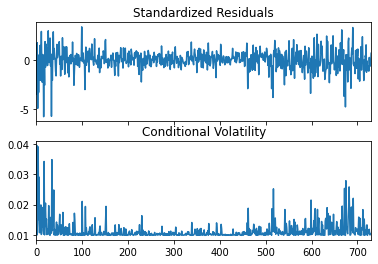

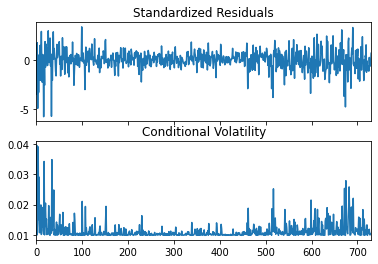

In [28]:
SZ180_arch_result_arch.plot()

In [29]:
SZ180_garch = arch_model(y= HS300_SZ180.iloc[:,1],mean = "Constant",lags=0,vol = "GARCH",p=1,o=0,q=1,dist="normal")

In [30]:
SZ180_arch_result_garch = SZ180_garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10937966039.967566
Iteration:      2,   Func. Count:     20,   Neg. LLF: 158500533379559.25
Iteration:      3,   Func. Count:     35,   Neg. LLF: 20413972464.035328
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2339.802702257155
            Iterations: 3
            Function evaluations: 45
            Gradient evaluations: 3


c:\users\11525\appdata\local\programs\python\python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [31]:
SZ180_arch_result_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2339.80
Distribution:                  Normal   AIC:                          -4671.61
Method:            Maximum Likelihood   BIC:                          -4653.23
                                        No. Observations:                  731
Date:                Wed, Dec 01 2021   Df Residuals:                      730
Time:                        16:19:31   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.7629e-04  3.173e-04      1.501      0.133 [-1.456e-04,1.098e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7936e-06  3.189e-12  8.760e+05      0.000 [2.794e-06,2.794e-06]
alpha[1]       0.1000  2.727e-03     36.664 2.689e-294   [9.465e-02,  0.105]
beta[1]        0.8800  8.741e-03    100.672      0.000     [  0.863,  0.897]
============================================================================

Covariance estimator: robust
"""

In [32]:
SZ180_arch_result_garch.params

mu          0.000476
omega       0.000003
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64

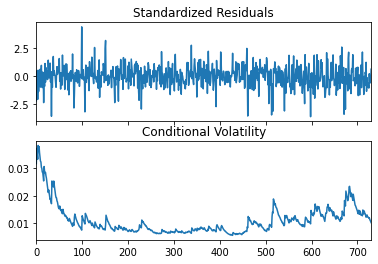

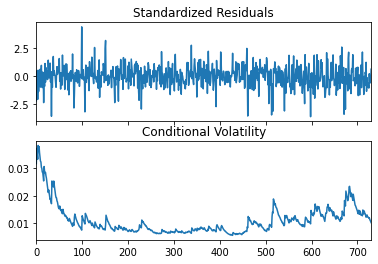

In [33]:
SZ180_arch_result_garch.plot()